In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import h5py
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

In [9]:
np.unique(h5f)

array(['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'],
      dtype='<U7')

In [5]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]
X_val=h5f['X_val'][:]
y_val=h5f['y_val'][:]

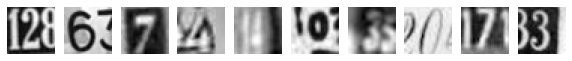

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.Flatten())

#dense layer of 128 neurons using relu
model.add(tf.keras.layers.Dense(128, activation='relu'))

#dense layer of 10 neurons using softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#reshaping for keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_val = X_val.reshape((X_val.shape[0], 32, 32, 1))

In [14]:
m_history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 14s 6ms/step - loss: 2.2835 - accuracy: 0.1506 - val_loss: 1.9316 - val_accuracy: 0.3952
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.6695 - accuracy: 0.4711 - val_loss: 1.2426 - val_accuracy: 0.6240
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1934 - accuracy: 0.6324 - val_loss: 1.2262 - val_accuracy: 0.6177
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0595 - accuracy: 0.6766 - val_loss: 1.0829 - val_accuracy: 0.6691
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.9662 - accuracy: 0.7094 - val_loss: 1.1326 - val_accuracy: 0.6467
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.8984 - accuracy: 0.7270 - val_loss: 0.9345 - val_accuracy: 0.7166
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.8705 - accuracy: 0.7380 - val_loss: 0.7855 - val_accuracy

In [16]:
print(m_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


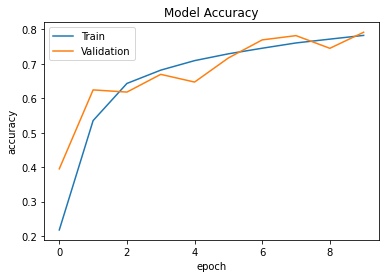

In [17]:
plt.plot(m_history.history['accuracy'])
plt.plot(m_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

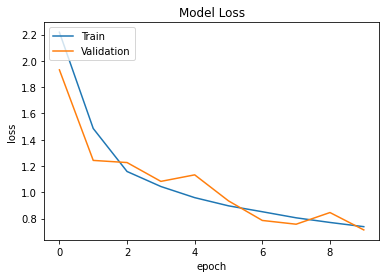

In [18]:
plt.plot(m_history.history['loss'])
plt.plot(m_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
model_result=model.evaluate(X_test,y_test,verbose=1)

563/563 [==============================] - 2s 3ms/step - loss: 0.7801 - accuracy: 0.7732


In [20]:
print("Model Accuracy : {0}".format(model_result[1]*100))
print("Model Loss : {0}".format(model_result[0]*100))

Model Accuracy : 77.32222080230713
Model Loss : 78.00716757774353


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,688,138
Trainable params: 3,688,138
Non-trainable params: 0
_________________________________________________________________
